# <p style="background-color: #4ad66d; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 10px; padding: 20px">🎵 Spotify Listening Behavior Analysis & Clustering</p>

<div style="border-radius:10px; padding: 15px; background-color: #4ad66d; font-size:120%; text-align:left; ">
    
## **Objective**  
1. Identify distinct track engagement patterns based on playtime, skips, and completion.  
2. Optimize music recommendations and playlist curation.  
3. Analyze platform-based differences in listening behavior.  

## **Overview**  
1. Dataset includes track details, play duration, platform, and skip behavior.  
2. Tracks exhibit different engagement levels based on user interactions.  
3. Clustering helps group tracks into meaningful categories for insights.

## <span style= color:#208b3a;> Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spotify-streaming-history/spotify_history.csv


### <span style= color:#208b3a;> Style

In [2]:
colors = ["#10451d", "#155d27", "#1a7431", "#208b3a", "#25a244", "#2dc653", "#4ad66d", "#6ede8a", "#92e6a7", "#b7efc5"]
sns.set_theme(style="darkgrid", rc={'axes.facecolor': '#b7efc5'})

### <span style= color:#208b3a;> Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/spotify-streaming-history/spotify_history.csv")

## <span style= color:#208b3a;> Dataset Overview

In [4]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


<div style="border-radius:10px; padding: 15px; background-color: #4ad66d; font-size:120%; text-align:left; ">
    
### **Track Information:**  
- **spotify_track_uri**: A **unique identifier** for each track on Spotify.  
- **track_name**: The **name of the track**.  
- **artist_name**: The **name of the artist** who performed the track.  
- **album_name**: The **name of the album** the track belongs to.  

### **Playback Details:**  
- **ts**: **Timestamp** indicating when the playback of the track ended.  
- **platform**: The **device or platform** used to stream the track (e.g., mobile, desktop, web player).  
- **ms_played**: The **duration of the track played** in milliseconds.  

### **Playback Behavior:**  
- **reason_start**: The **reason why the track started playing** (e.g., user selection, autoplay, recommendation).  
- **reason_end**: The **reason why the track stopped playing** (e.g., natural end, user skip, interruption).  
- **shuffle**: Indicates whether **shuffle mode** was active during playback (**TRUE or FALSE**).  
- **skipped**: Indicates whether the user **manually skipped** to the next track (**TRUE or FALSE**).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [6]:
df.shape

(149860, 11)

In [7]:
df.describe(include="object")

,spotify_track_uri,ts,platform,track_name,artist_name,album_name,reason_start,reason_end
count,149860,149860,149860,149860,149860,149860,149717,149743
unique,16527,140422,6,13839,4113,7948,13,15
top,1BLOVHYYlH4JUHQGcpt75R,2018-09-30 21:43:18,android,Ode To The Mets,The Beatles,The Beatles,trackdone,trackdone
freq,207,125,139821,207,13621,2063,76655,77194


In [8]:
df_columns = df.columns

In [9]:
for i in range(len(df_columns)):
    print(f"unique values of {df_columns[i]}:",df[df_columns[i]].nunique())

unique values of spotify_track_uri: 16527
unique values of ts: 140422
unique values of platform: 6
unique values of ms_played: 43082
unique values of track_name: 13839
unique values of artist_name: 4113
unique values of album_name: 7948
unique values of reason_start: 13
unique values of reason_end: 15
unique values of shuffle: 2
unique values of skipped: 2


## <span style= color:#208b3a;>Data Cleaning and Preprocessing

In [10]:
df['ts'] = pd.to_datetime(df["ts"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  149860 non-null  object        
 1   ts                 149860 non-null  datetime64[ns]
 2   platform           149860 non-null  object        
 3   ms_played          149860 non-null  int64         
 4   track_name         149860 non-null  object        
 5   artist_name        149860 non-null  object        
 6   album_name         149860 non-null  object        
 7   reason_start       149717 non-null  object        
 8   reason_end         149743 non-null  object        
 9   shuffle            149860 non-null  bool          
 10  skipped            149860 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(7)
memory usage: 10.6+ MB


In [11]:
df["reason_start"].isnull().sum()

143

In [12]:
reason_start_count = df["reason_start"].value_counts().reset_index()  
reason_start_count.columns = ["reason_start", "count"] 
reason_start_count

,reason_start,count
0,trackdone,76655
1,fwdbtn,53793
2,clickrow,11228
3,appload,3729
4,backbtn,2205
5,playbtn,1458
6,remote,477
7,trackerror,120
8,unknown,23
9,nextbtn,21


In [13]:
reason_start_count = df["reason_end"].value_counts().reset_index()  
reason_start_count.columns = ["reason_end", "count"] 
reason_start_count

,reason_end,count
0,trackdone,77194
1,fwdbtn,53470
2,endplay,10119
3,logout,4367
4,backbtn,2182
5,unexpected-exit-while-paused,1725
6,unknown,268
7,remote,224
8,unexpected-exit,118
9,clickrow,34


In [14]:
values = {"reason_start": df["reason_start"].mode()[0],"reason_end": df["reason_end"].mode()[0]}
df.fillna(value=values,inplace= True)

In [15]:
df.isnull().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

## <span style= color:#208b3a;> Feature Engineering

In [16]:
df['date'] = df['ts'].dt.date
df['month'] = df['ts'].dt.to_period('M')
df['day_of_week'] = df['ts'].dt.day_name()
df['hour'] = df['ts'].dt.hour
df["year"] = df["ts"].dt.year

## <span style= color:#208b3a;> Exploratory Data Analysis

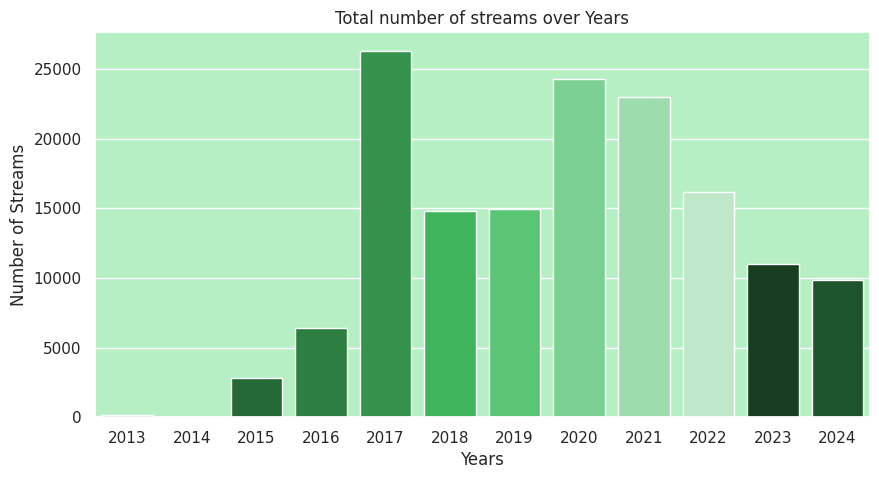

In [17]:
yearly_streams = df.groupby("year").size()
plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_streams.index, y=yearly_streams.values, palette=colors)
plt.xlabel('Years')
plt.ylabel('Number of Streams')
plt.title('Total number of streams over Years')
plt.show()

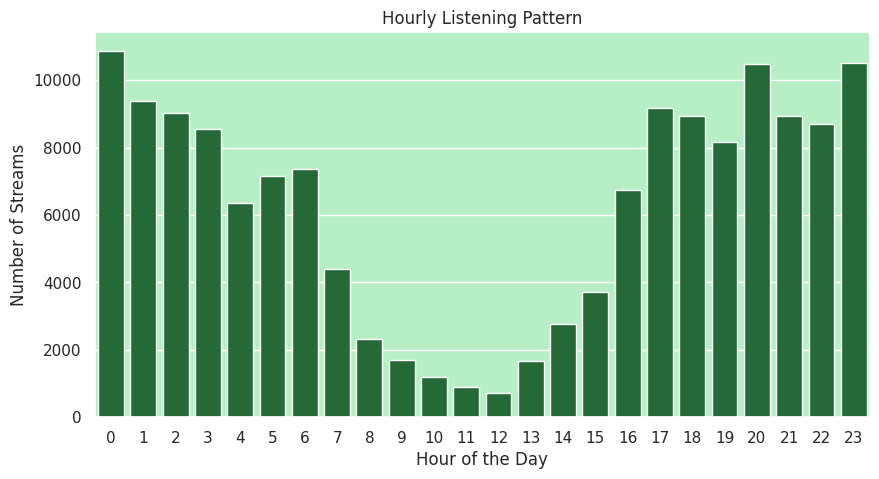

In [18]:
hourly_streams = df.groupby('hour').size()
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_streams.index, y=hourly_streams.values,palette=["#1a7431"])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Streams')
plt.title('Hourly Listening Pattern')
plt.show()

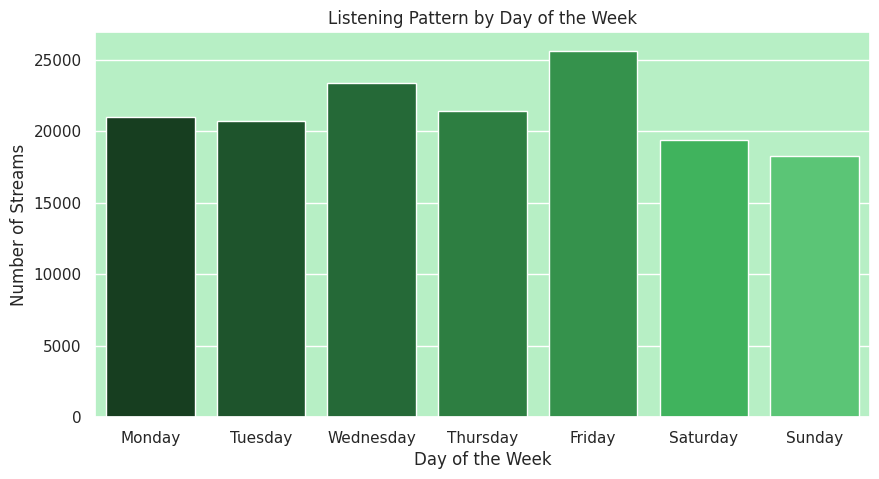

In [19]:
day_streams = df.groupby('day_of_week').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 5))
sns.barplot(x=day_streams.index, y=day_streams.values, palette=colors)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Streams')
plt.title('Listening Pattern by Day of the Week')
plt.show()

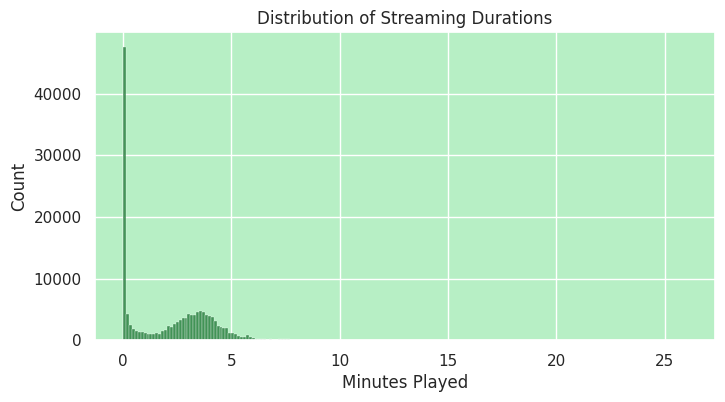

In [20]:
df['minutes_played'] = df['ms_played'] / 60000  
plt.figure(figsize=(8,4))
sns.histplot(df['minutes_played'],color="#1a7431")
plt.xlabel('Minutes Played')
plt.ylabel('Count')
plt.title('Distribution of Streaming Durations')
plt.show()

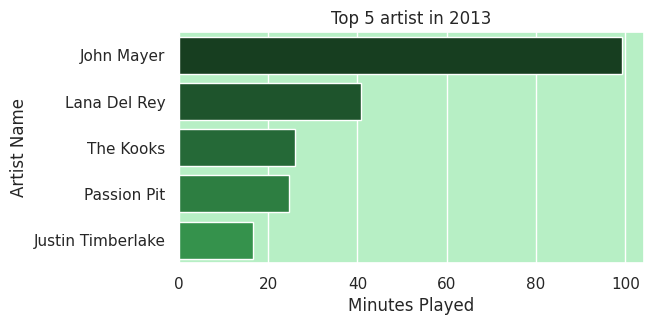

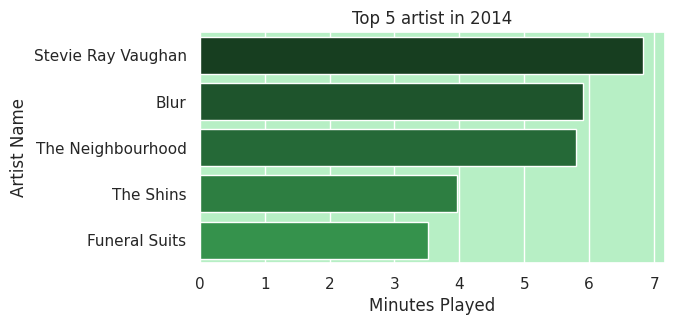

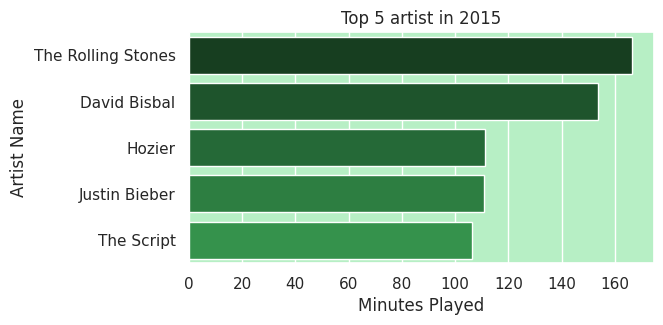

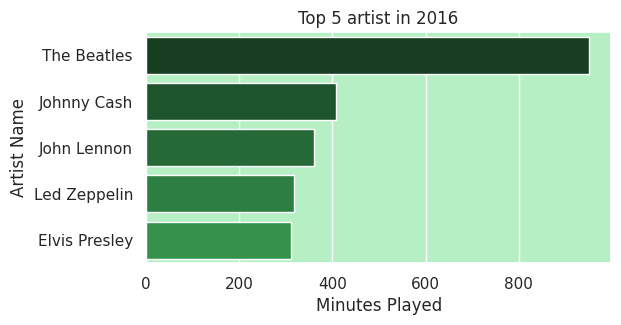

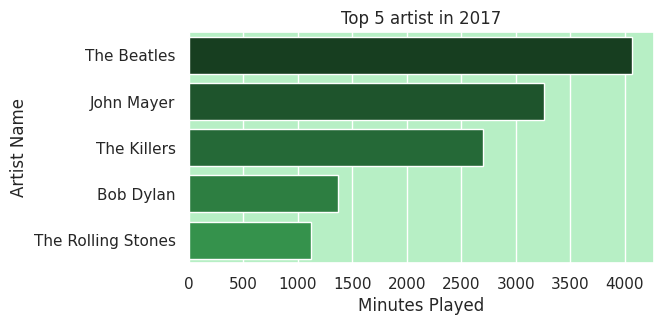

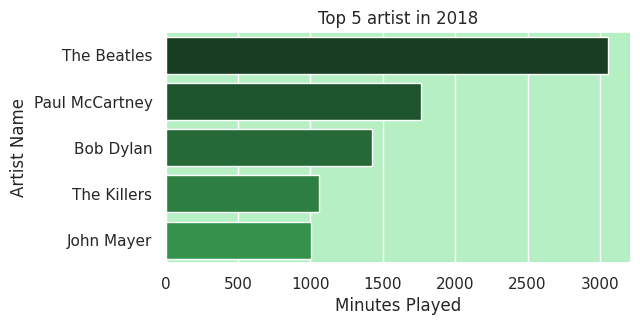

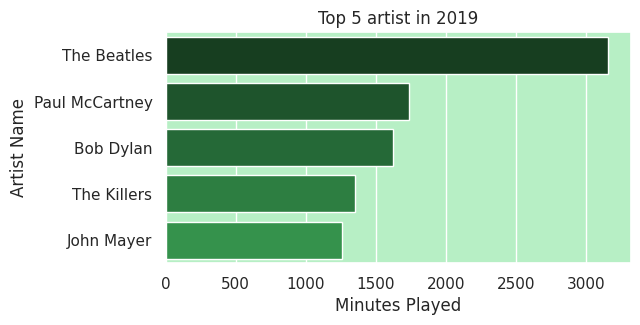

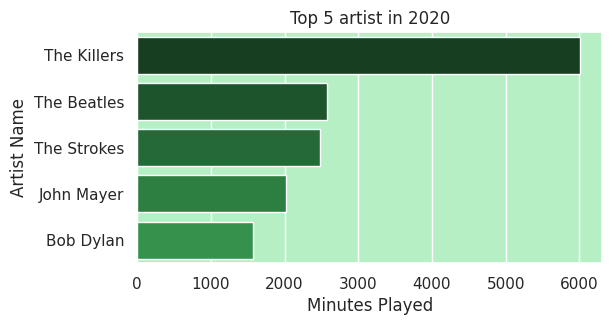

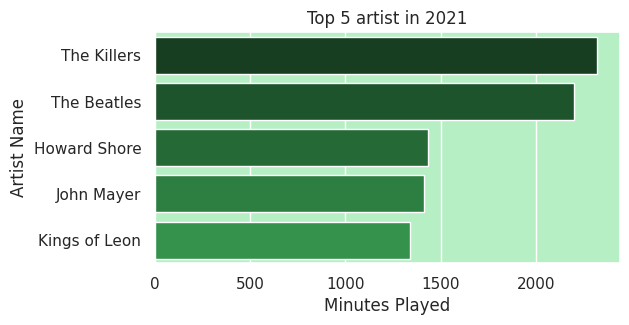

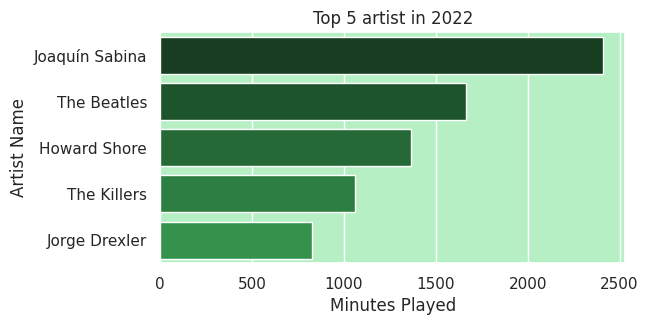

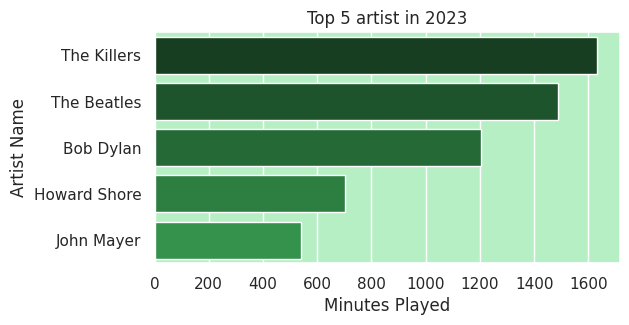

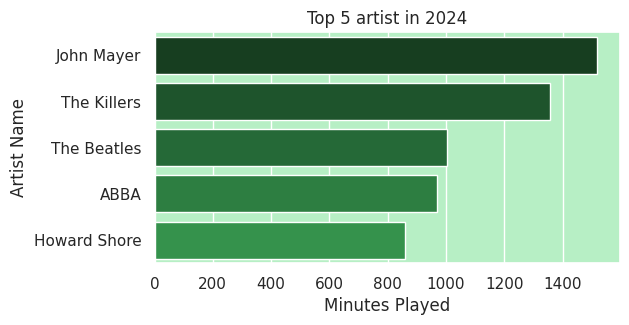

In [21]:
top5_artist = df.groupby(["artist_name", "year"])["ms_played"].sum().reset_index()

top5_artist["minutes_played"] = top5_artist["ms_played"] / (1000 * 60)

years = sorted(df["year"].unique())
for i in range(len(years)):
    top_artists = top5_artist[top5_artist["year"] == years[i]].nlargest(5, "minutes_played")

    
    plt.figure(figsize=(6,3))
    sns.barplot(top_artists,x="minutes_played",y="artist_name",palette=colors)
    plt.xlabel("Minutes Played")
    plt.ylabel("Artist Name")
    plt.title(f"Top 5 artist in {years[i]}")
    plt.show()

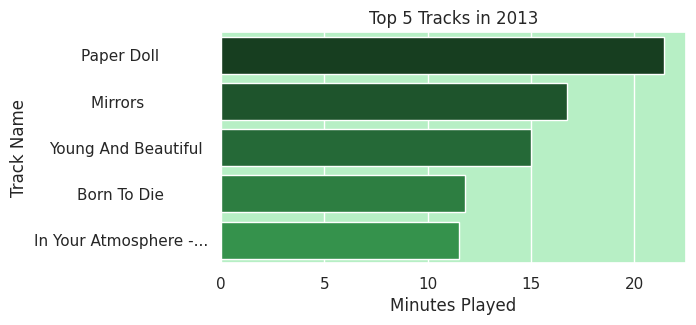

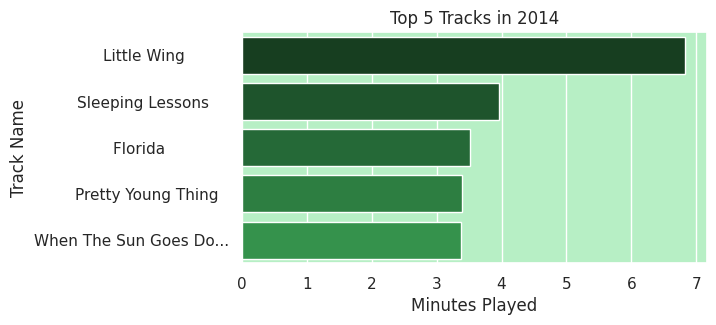

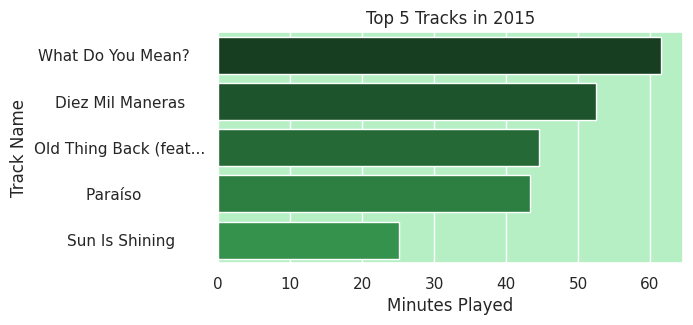

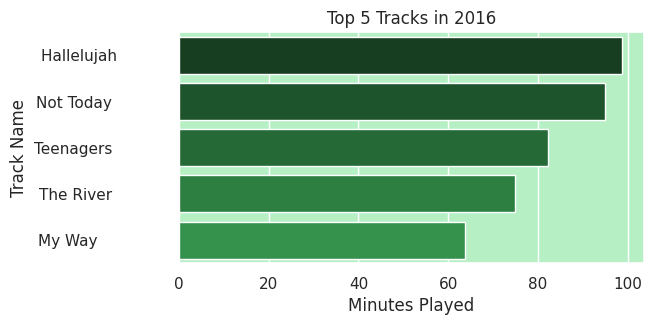

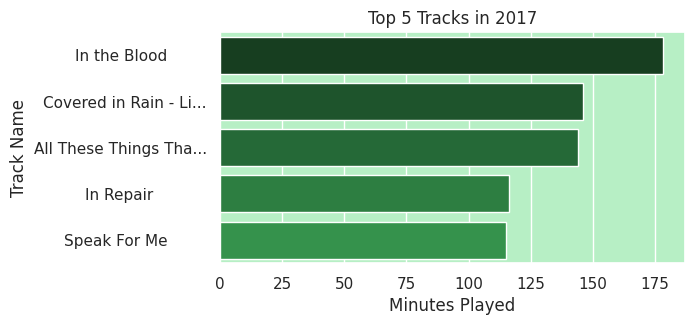

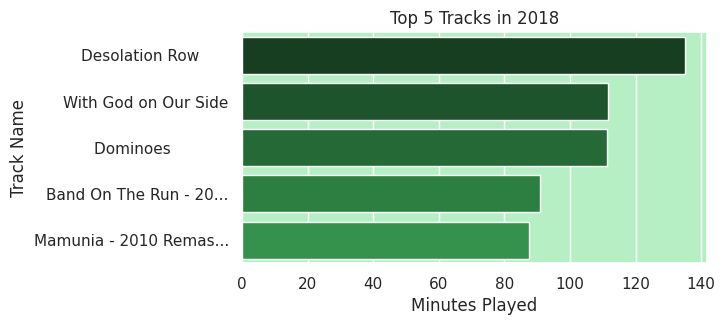

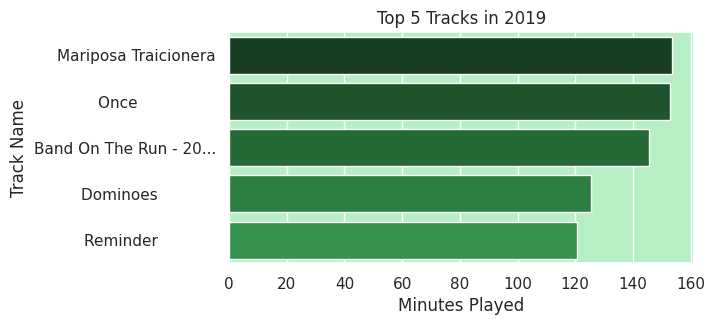

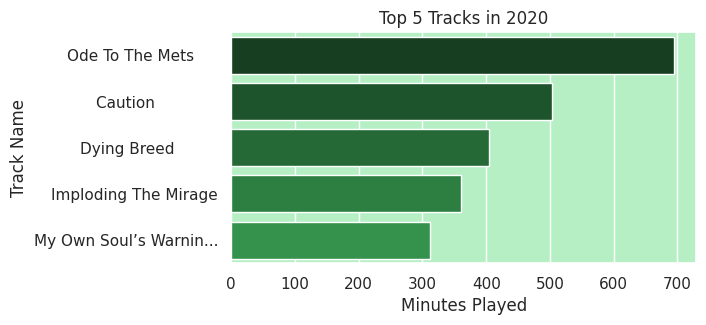

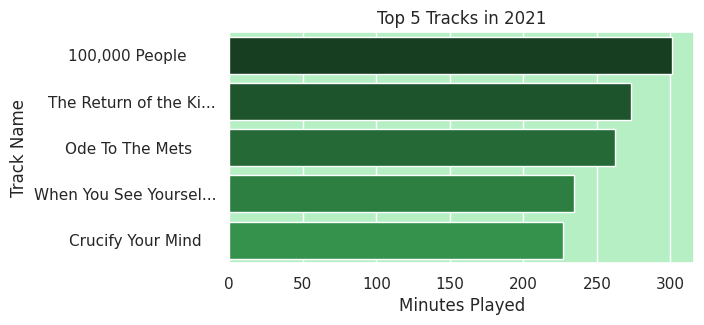

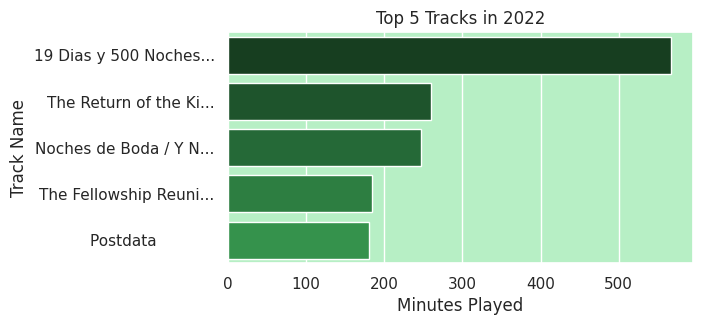

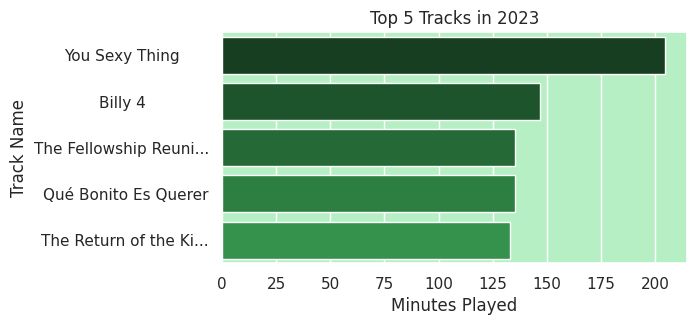

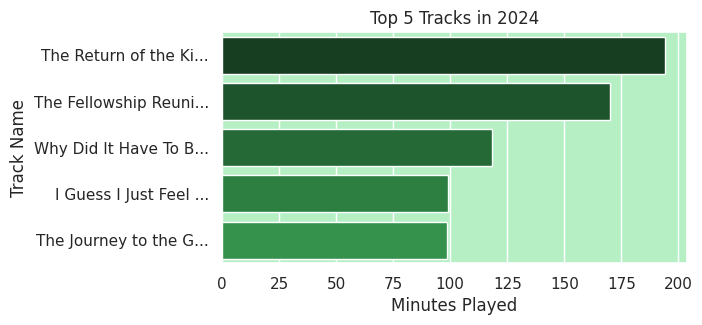

In [22]:
top5_track = df.groupby(["track_name", "year"])["ms_played"].sum().reset_index()
top5_track["minutes_played"] = top5_track["ms_played"] / (1000 * 60)

years = sorted(df["year"].unique())

for i in range(len(years)):
    top_track = top5_track[top5_track["year"] == years[i]].nlargest(5, "minutes_played")
    
    plt.figure(figsize=(6,3))
    sns.barplot(data=top_track, x="minutes_played", y="track_name", palette=colors)
    
    # Get current y-tick positions
    ticks = range(len(top_track))

    plt.yticks(
    ticks=ticks, 
    labels=[label[:20] + "..." if len(label) > 20 else label+" "* (20-len(label)) for label in top_track["track_name"]]
)
    plt.xlabel("Minutes Played")
    plt.ylabel("Track Name")
    plt.title(f"Top 5 Tracks in {years[i]}")
    plt.show()


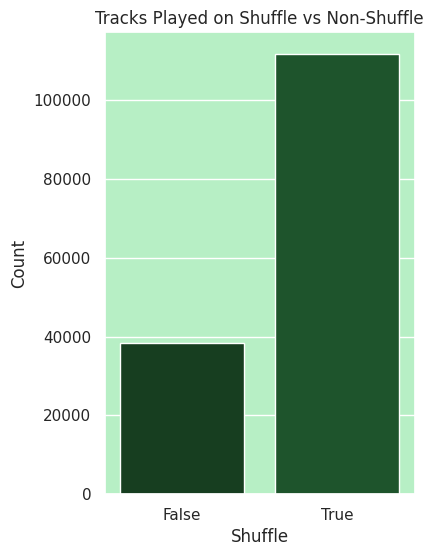

In [23]:
plt.figure(figsize=(4,6))
sns.countplot(x='shuffle', data=df,palette=colors)
plt.title('Tracks Played on Shuffle vs Non-Shuffle')
plt.xlabel('Shuffle')
plt.ylabel('Count')
plt.show()

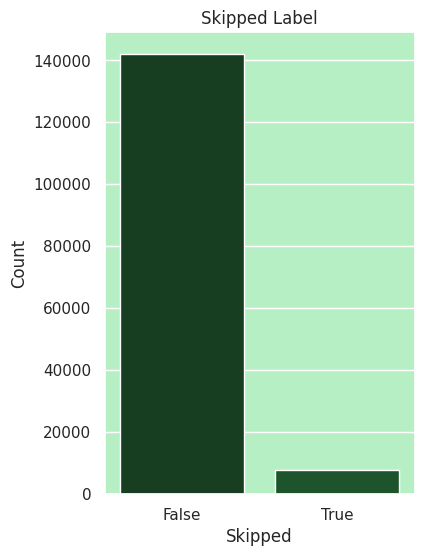

In [24]:
plt.figure(figsize=(4,6))
sns.countplot(x='skipped', data=df,palette=colors)
plt.title("Skipped Label")
plt.xlabel('Skipped')
plt.ylabel('Count')
plt.show()

In [25]:
skipped_data = df[df["skipped"]== True]
not_skip_data = df[df["skipped"]== False]

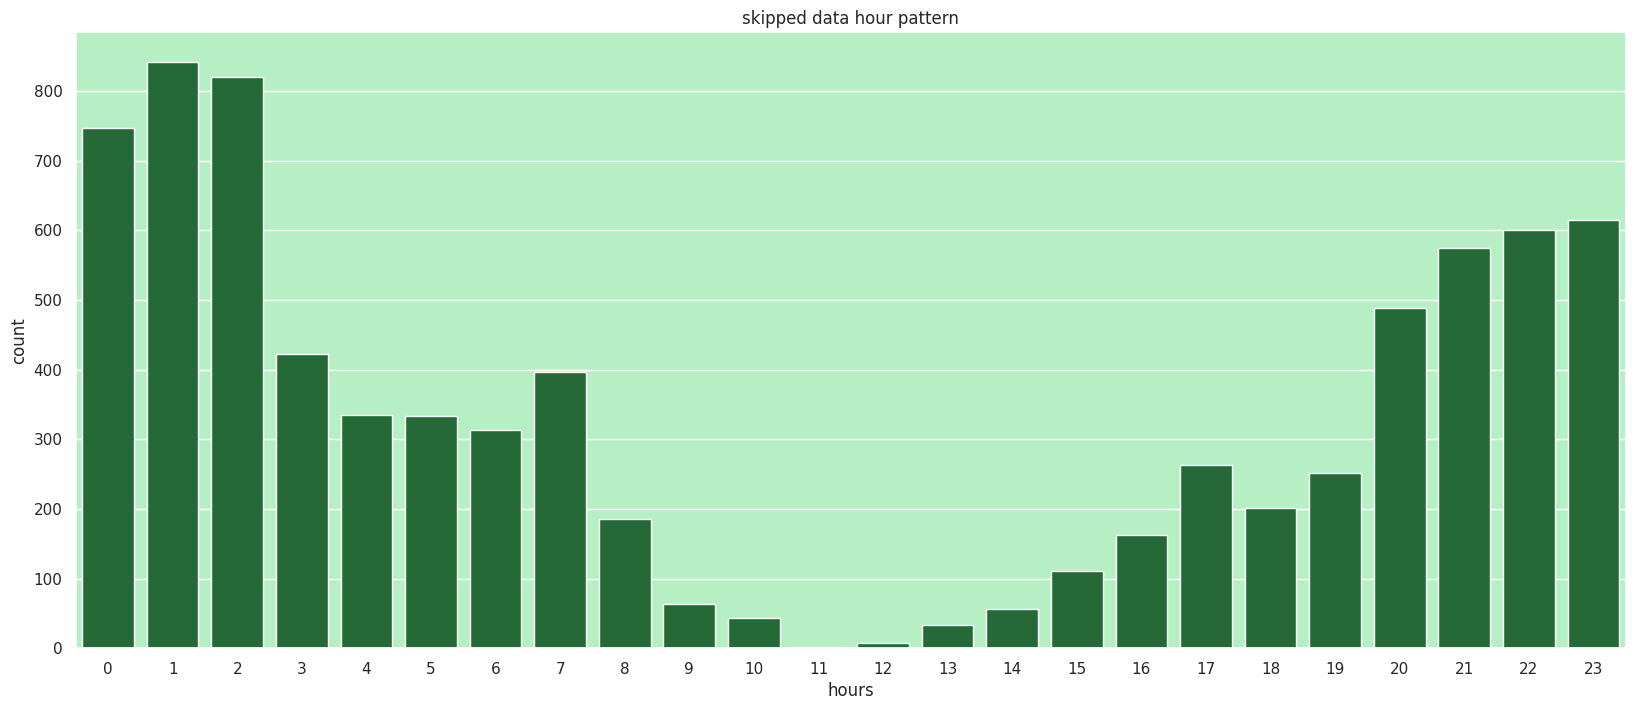

In [26]:
#skipped_data.groupby("hour").size()
plt.figure(figsize= (20,8))
sns.countplot(x="hour",data=skipped_data, palette= ["#1a7431"])
plt.xlabel("hours")
plt.ylabel("count")
plt.title("skipped data hour pattern")
plt.show()

# <p style="background-color: #4ad66d; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 10px; padding: 20px">Clustering Listener Pattern</p>

In [27]:
df = df.drop_duplicates()

In [28]:
df.duplicated().sum()

0

In [29]:
print(df.duplicated(subset=["track_name","artist_name","album_name"]).sum())
print(df["track_name"].nunique())

133165
13839


In [30]:
data = df.groupby(["track_name", "artist_name", "album_name"], as_index=False).agg({
    "ms_played": "sum",
    "platform": lambda x: x.mode()[0],  # Keep most common platform
    "skipped": "mean",  # Keep average skip rate
    "shuffle": "mean",
    "reason_start": lambda x: x.mode()[0],
    "reason_end": lambda x: x.mode()[0]
})


In [31]:
data.head()

,track_name,artist_name,album_name,ms_played,platform,skipped,shuffle,reason_start,reason_end
0,!!!!!!!,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",13561,android,0.000000,0.00,clickrow,trackdone
1,"""45""",The Gaslight Anthem,Handwritten,2726197,android,0.000000,0.72,fwdbtn,trackdone
2,"""C"" Jam Blues - Live At Symphony Hall, Boston,...",Louis Armstrong,Satchmo At Symphony Hall 65th Anniversary: The...,231690,android,0.000000,0.00,trackdone,trackdone
3,"""Heroes"" / ""Helden"" - 2001 Remaster",David Bowie,'Heroes' / 'Helden' / 'Héros',4946,cast to device,0.000000,0.00,clickrow,endplay
4,"""Hit the Quan"" #HTQ",iLoveMemphis,"""Hit the Quan"" #HTQ",215516,android,0.666667,1.00,backbtn,endplay


In [32]:
features = data.drop(columns=["track_name", "artist_name", "album_name"])
track_details = data[["track_name", "artist_name", "album_name"]]



In [33]:
features.head()

,ms_played,platform,skipped,shuffle,reason_start,reason_end
0,13561,android,0.000000,0.00,clickrow,trackdone
1,2726197,android,0.000000,0.72,fwdbtn,trackdone
2,231690,android,0.000000,0.00,trackdone,trackdone
3,4946,cast to device,0.000000,0.00,clickrow,endplay
4,215516,android,0.666667,1.00,backbtn,endplay


<function matplotlib.pyplot.show(close=None, block=None)>

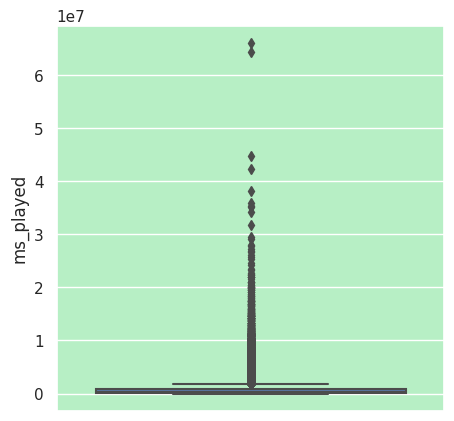

In [34]:
plt.figure(figsize=(5,5))

sns.boxplot(y=features["ms_played"])
plt.show


**there is an outlier . so we can go for log1p to reduce the outlier value**

In [35]:
df["ms_played"] = np.log1p(df["ms_played"])  # log(1 + x) to avoid log(0)


## <span style= color:#208b3a;>One hot encoding

In [36]:
encoded_df =pd.get_dummies(features,drop_first=True,dtype=int)

In [37]:
encoded_df.shape

(15510, 31)

In [38]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15510 entries, 0 to 15509
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ms_played                                15510 non-null  int64  
 1   skipped                                  15510 non-null  float64
 2   shuffle                                  15510 non-null  float64
 3   platform_cast to device                  15510 non-null  int64  
 4   platform_iOS                             15510 non-null  int64  
 5   platform_mac                             15510 non-null  int64  
 6   platform_web player                      15510 non-null  int64  
 7   platform_windows                         15510 non-null  int64  
 8   reason_start_autoplay                    15510 non-null  int64  
 9   reason_start_backbtn                     15510 non-null  int64  
 10  reason_start_clickrow                    15510

## <span style= color:#208b3a;>Dimentionality Reduction

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df)  # Normalize data

pca = PCA(n_components=0.95)  # Keep 95% variance
reduced_data = pca.fit_transform(scaled_data)



In [40]:
reduced_data

array([[ 0.14327115,  1.76514452, -0.33811205, ...,  0.27755781,
         0.69958488, -1.53771027],
       [-0.35405298, -1.18629045,  0.13508735, ...,  0.18182072,
         0.28288655, -1.57703752],
       [ 1.73127323,  0.211594  ,  0.019045  , ...,  0.29348361,
         0.1573655 , -0.04156738],
       ...,
       [ 1.39732851, -0.42797484, -0.05880808, ..., -0.25768742,
        -0.05131715, -0.04884113],
       [ 1.7255867 ,  0.22401747,  0.01790196, ...,  0.29023561,
         0.15833972, -0.04395963],
       [-0.0714599 ,  1.32150871, -0.38842639, ..., -0.08537797,
         0.5591099 , -1.53923652]])

In [41]:

!pip install -U yellowbrick

## <span style= color:#208b3a;>Cluster Modelling

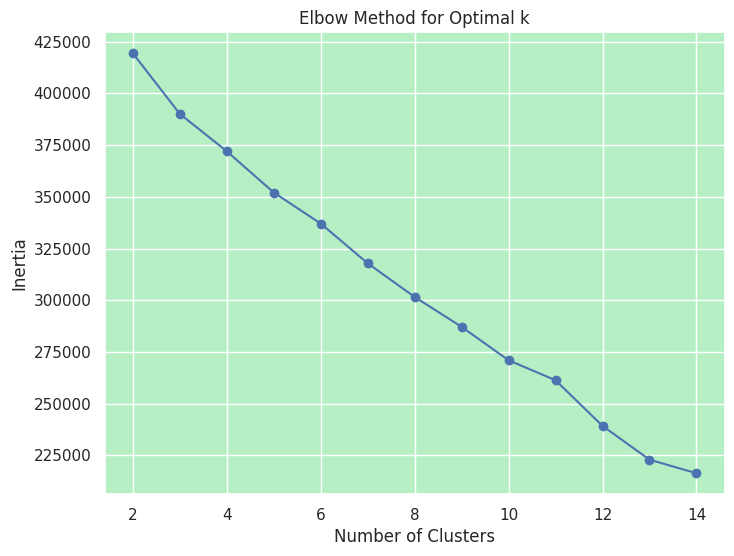

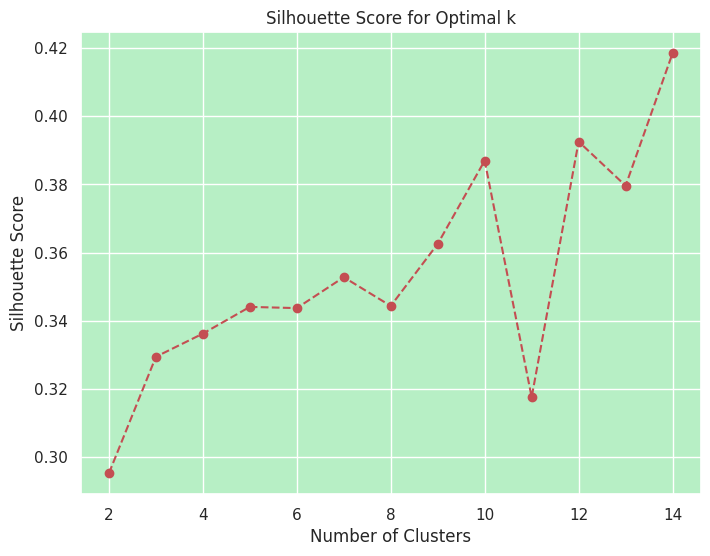

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []

for k in range(2, 15):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(reduced_data)  
    score = silhouette_score(reduced_data, labels)  
    silhouette_scores.append(score)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle="--", color="r")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


## <span style= color:#208b3a;>Evalution Matrics

In [43]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_data)  
score = silhouette_score(scaled_data, labels) 
db_index = davies_bouldin_score(scaled_data, labels)
print("silhouette_score:",score)
print("db index:",db_index)


silhouette_score: 0.3631856838238592
db index: 0.7818375527524459


<div style="border-radius:10px; padding: 15px; background-color: #4ad66d; font-size:120%; text-align:left; ">

- **Good db value 0.78 for 10 cluster** 0 closer to zero is the best value.
- **0.36 is the above average score. may points overlap**

In [44]:
data["cluster"] = labels


In [45]:
data.head()

,track_name,artist_name,album_name,ms_played,platform,skipped,shuffle,reason_start,reason_end,cluster
0,!!!!!!!,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",13561,android,0.000000,0.00,clickrow,trackdone,2
1,"""45""",The Gaslight Anthem,Handwritten,2726197,android,0.000000,0.72,fwdbtn,trackdone,0
2,"""C"" Jam Blues - Live At Symphony Hall, Boston,...",Louis Armstrong,Satchmo At Symphony Hall 65th Anniversary: The...,231690,android,0.000000,0.00,trackdone,trackdone,1
3,"""Heroes"" / ""Helden"" - 2001 Remaster",David Bowie,'Heroes' / 'Helden' / 'Héros',4946,cast to device,0.000000,0.00,clickrow,endplay,2
4,"""Hit the Quan"" #HTQ",iLoveMemphis,"""Hit the Quan"" #HTQ",215516,android,0.666667,1.00,backbtn,endplay,2


In [46]:
data.groupby("cluster", as_index=False).agg({
    "ms_played": "mean",
    "platform": lambda x: x.mode()[0],  # Keep most common platform
    "skipped": "mean",
    "shuffle": "mean",
    "reason_start": lambda x: x.mode()[0],
    "reason_end": lambda x: x.mode()[0]
})

,cluster,ms_played,platform,skipped,shuffle,reason_start,reason_end
0,0,1.435790e+06,android,0.173787,0.818935,fwdbtn,fwdbtn
1,1,1.567539e+06,android,0.018631,0.492992,trackdone,trackdone
2,2,1.802622e+05,android,0.216221,0.469624,clickrow,endplay
3,3,1.127086e+05,web player,0.190476,0.071429,clickrow,clickrow
4,4,3.185000e+03,web player,0.000000,0.000000,autoplay,clickrow
5,5,4.365100e+05,web player,0.500000,0.000000,popup,popup
6,6,5.521650e+04,android,0.000000,0.333333,clickrow,unexpected-exit
7,7,1.927600e+05,android,0.000000,0.303030,clickrow,remote
8,8,8.539600e+04,web player,0.000000,0.000000,nextbtn,nextbtn
9,9,2.047432e+05,android,0.005312,0.369190,trackdone,logout


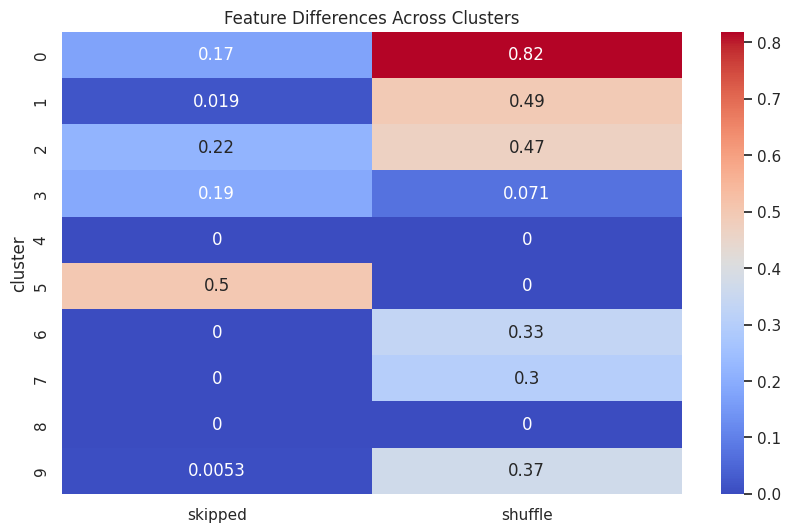

In [47]:
plt.figure(figsize=(10,6))

sns.heatmap(data.groupby("cluster")[[ "skipped", "shuffle"]].mean(), cmap="coolwarm", annot=True)
plt.title("Feature Differences Across Clusters")
plt.show()

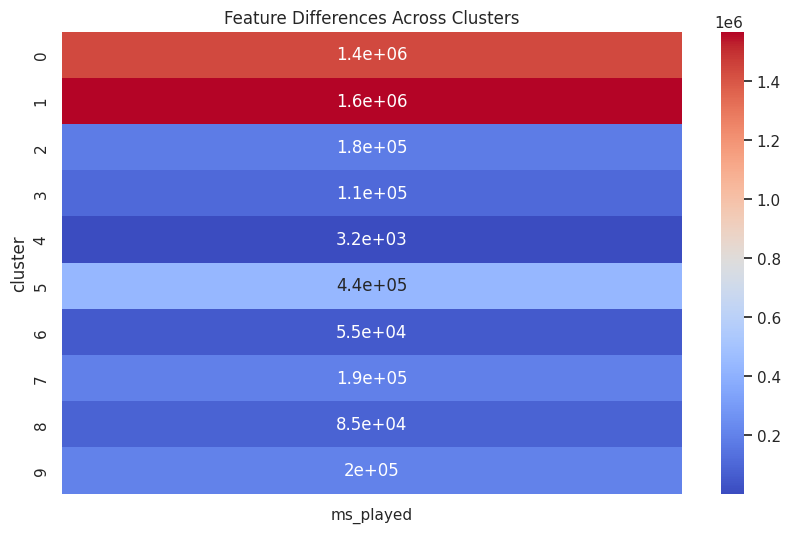

In [48]:
plt.figure(figsize=(10,6))

sns.heatmap(data.groupby("cluster")[[ "ms_played"]].mean(), cmap="coolwarm", annot=True)
plt.title("Feature Differences Across Clusters")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #4ad66d; font-size:120%; text-align:left; ">

# **🎵 Cluster Interpretation for Track Playback Data**  

This clustering groups track playbacks based on **listening behavior, platform, and user interactions**. Here’s an overview of each cluster:

---

## **Key Cluster Insights:**

### **🎯 High Engagement Clusters:**
1. **Cluster 0 & 1** (💚 Highly Engaged Listeners)  
   - **Longest playtime** (~1.4M - 1.5M ms).  
   - **Low skip rate (1.8% in Cluster 1)** → Likely enjoying their playlists.  
   - **Cluster 0 has high shuffle usage (81%)** → Exploring different tracks.  
   - **"fwdbtn" & "trackdone" as reasons** → Users either manually skipping forward or finishing tracks.  

---

### **📉 Moderate Engagement Clusters:**
2. **Cluster 2 & 3** (🟡 Frequent Skippers)  
   - **Playtime: ~112K - 180K ms** → Short listening sessions.  
   - **Skip rate: 19% - 21%** → Users are frequently changing tracks.  
   - **Platform: Android & Web Player**.  
   - **"clickrow" & "endplay" as end reasons** → Users might be **exploring** or **dissatisfied** with tracks.  

3. **Cluster 7 & 9** (🟠 Selective Listeners)  
   - **Playtime: ~192K - 205K ms**.  
   - **Very low skip rate (~0-0.5%)** → Engaged with selected tracks.  
   - **"clickrow" & "remote" (Cluster 7) & "trackdone" (Cluster 9)** → More **intentional playback**.  
   - **Platform: Android**.  

---

### **🚨 Low Engagement or Passive Clusters:**
4. **Cluster 4** (🔴 Instant Skip)  
   - **Shortest playtime (3.1K ms)** → Almost immediately skipped.  
   - **"autoplay" as start reason** → Likely an algorithmic suggestion that was **ignored**.  

5. **Cluster 5 & 8** (🔵 Web Player Skippers)  
   - **Playtime: 85K - 436K ms**.  
   - **Skip rate: 50% in Cluster 5** → Likely **casual** or **passive listening**.  
   - **"popup" & "nextbtn" as start reasons** → Possibly **external triggers** or user interruptions.  

6. **Cluster 6 & 9** (⚠️ Unexpected Exits)  
   - **Cluster 6:** Low playtime (~55K ms) with **"unexpected-exit"** as reason → Possible **app crashes or forced stops**.  
   - **Cluster 9:** Low skip rate but ends with **logout** → Users leaving the app after playback.  

---

## **Summary & Business Insights**
- **Cluster 0 & 1:** **Engaged users** → Encourage them with **personalized playlists & recommendations**.  
- **Cluster 2 & 3:** **Frequent skippers** → Improve **track recommendations** to reduce dissatisfaction.  
- **Cluster 4:** **Autoplay is ineffective** → Adjust **algorithm-based track selection**.  
- **Cluster 6 & 9:** **Unexpected exits** → Investigate **technical issues or logout behaviors**.  

